# Loading the dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk


In [2]:
df = pd.read_csv(r"undersample-binarydata.csv")
#df = df.head(500)

In [3]:
count=df['target'].value_counts()
count

0    78
1    78
Name: target, dtype: int64

In [4]:
df.head()

,Unnamed: 0,body,target
0,0,"So I'm gay. And ""straight acting"". I've always...",0
1,1,"I keep thinking about kids. I'm bi cismale, se...",0
2,2,I've considered myself bi for a few years but ...,0
3,3,"This year I moved in with 3 other guys, in an ...",0
4,4,Did my toenails (gay guy here) for the first t...,0


In [5]:
df = df[['body', 'target']]
df = df.sample(frac = 1)
df.head()

,body,target
28,I have been dating the same guy for 3.5 years....,0
136,I hate every single thing about myself\r\n\r\n...,1
51,I read a book of essays by parents of LGBT kid...,0
52,This whole election cycle has been a shitshow\...,0
1,"I keep thinking about kids. I'm bi cismale, se...",0


In [6]:
df.to_csv('dataset_undersample_s.csv')

In [7]:
df.shape

(156, 2)

# Data Analysis

In [8]:
df.isnull().sum()

body      0
target    0
dtype: int64

In [9]:
df["target"]

28     0
136    1
51     0
52     0
1      0
      ..
112    1
38     0
90     1
10     0
137    1
Name: target, Length: 156, dtype: int64

# Data Preprocessing

In [10]:
from nltk.corpus import stopwords
#nltk.download('stopwords')

stopwords = stopwords.words('english')

In [11]:
stemmer = nltk.PorterStemmer()

In [12]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
#nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

In [13]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\n|\t', '', text)
    text = re.sub('\d', '', text) ##
    text = re.sub(r'[^\w\s]', ' ', text) ##
    text = [word for word in text.split() if word not in stopwords] 
    text = [stemmer.stem(word) for word in text]
    
    text = " ".join(text)
    
    return text
    

In [14]:
df['clean'] = df['body'].apply(preprocess)

In [15]:
avg_len = df['body'].str.len().mean()
avg_word_count = df['body'].str.split().str.len().mean()

print('Original Tweets: ')
print(int(avg_len))
print(int(avg_word_count))


avg_clean_len = df['clean'].str.len().mean()
avg_clean_word_count = df['clean'].str.split().str.len().mean()

print('Preprocessed comments: ')
print(int(avg_clean_len))
print(int(avg_clean_word_count))


Original Tweets: 
1118
204
Preprocessed comments: 
548
92


Text(0.5, 1.0, 'Avg length of comments')

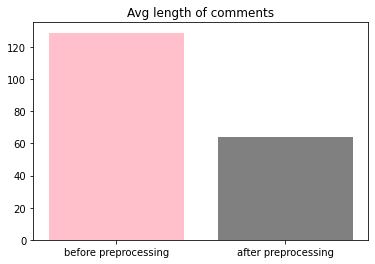

In [16]:
y = [129, 64]
x  = ['before preprocessing', 'after preprocessing']

plt.bar(x, y, color = ['pink', 'gray'])
plt.title('Avg length of comments')

Text(0.5, 1.0, 'Avg word count of comments')

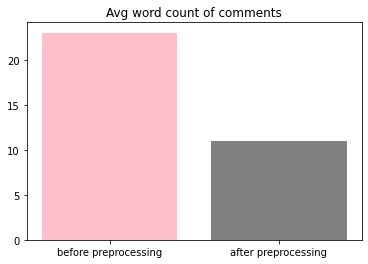

In [17]:

y = [23, 11]
x  = ['before preprocessing', 'after preprocessing']

plt.bar(x, y, color = ['pink', 'gray'])
plt.title('Avg word count of comments')

In [18]:
data = df[['clean']]

In [19]:
data.head()

,clean
28,date guy year first met marri woman addict clo...
136,hate everi singl thing need smash head hammer ...
51,read book essay parent lgbt kid one parent tal...
52,whole elect cycl shitshow complet utter fuck c...
1,keep think kid bi cismal see ace cisfemal hope...


In [20]:
df["target"]

28     0
136    1
51     0
52     0
1      0
      ..
112    1
38     0
90     1
10     0
137    1
Name: target, Length: 156, dtype: int64

# Dataset splitting

In [21]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(df['clean'], df['target'], test_size = 0.25, random_state = 0)
#X1_train=df['clean'].head(117)
#X1_test=df['clean'].tail(39)
#y1_train=df['target'].head(117)
#y1_test=df['target'].tail(39)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)


(117,)
(117,)
(39,)
(39,)


In [22]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(df['clean'], df['target'], test_size = 0.25, random_state = 0)
#X2_train=df['clean'].head(117)
#X2_test=df['clean'].tail(39)
#y2_train=df['target'].head(117)
#y2_test=df['target'].tail(39)
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)


(117,)
(117,)
(39,)
(39,)


# Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [24]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df=2, analyzer = 'word', ngram_range=(1,1), max_features = 659, stop_words='english')

X1_train = bow_vectorizer.fit_transform(X1_train)
X1_test = bow_vectorizer.transform(X1_test)


In [25]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df=2, max_features = 659, analyzer = 'word', ngram_range=(1,1), stop_words='english')

X2_train = tfidf_vectorizer.fit_transform(X2_train)
X2_test = tfidf_vectorizer.transform(X2_test)

X2_train.shape

(117, 659)

# Model Training

In [26]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
# from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# MLP

In [27]:
from sklearn.model_selection import GridSearchCV
import numpy as np

rf = MLPClassifier()
batch_size = np.arange(10,100,10)
learn_rate = np.arange(0.001,0.3)
#epochs = [10, 50, 100]
#param_grid = dict(batch_size=batch_size, learning_rate_init=learn_rate)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,),(100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': np.arange(0.0001,0.05),
    'learning_rate': ['constant','adaptive'],
}
grid1 = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=5)
grid_result = grid1.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.3f"
      % (grid1.best_params_, grid1.best_score_))

The best parameters are {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'} with a score of 0.778


In [28]:
#model1 = MLPClassifier(max_iter=500, activation='relu' ,batch_size=60, learning_rate_init=0.001)

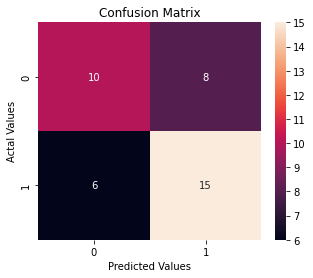

In [29]:
#model1.fit(X1_train, y1_train)  

y1_pred = grid1.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)

In [30]:
print(y1_pred)

[1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0]


In [31]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59        18
           1       0.65      0.71      0.68        21

    accuracy                           0.64        39
   macro avg       0.64      0.63      0.64        39
weighted avg       0.64      0.64      0.64        39



In [32]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

#from utils.plot_ROC_Curve import plot_roc_pr

#plot_roc_pr(y_pred = y1_pred, y_test = y1_test)


In [33]:
#!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt
import matplotlib.pyplot as plt

[9.99999840e-01 2.52697135e-04 1.54586460e-01 9.99941421e-01
 9.05133263e-01 9.99146055e-01 1.96400929e-03 8.54392953e-05
 1.40991131e-01 9.99706812e-01 5.19753272e-05 9.97238818e-01
 9.76430156e-01 9.38466807e-01 3.90922905e-02 2.05023867e-01
 8.21064574e-01 8.60384655e-04 1.15497762e-01 1.07415028e-04
 3.10058606e-01 9.66209585e-01 9.99997473e-01 9.79461794e-01
 9.99769598e-01 9.94708105e-01 9.93129840e-01 9.99388526e-01
 9.88536962e-01 2.09858895e-06 8.80353926e-01 9.96927169e-01
 1.07415028e-04 9.49840463e-01 9.15765685e-01 8.38881126e-01
 8.43588059e-02 9.99098403e-01 5.82654574e-02]


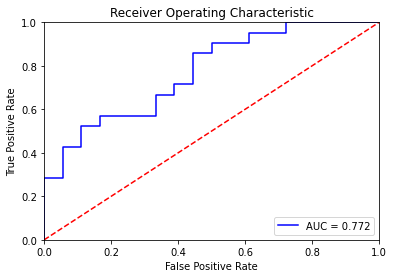

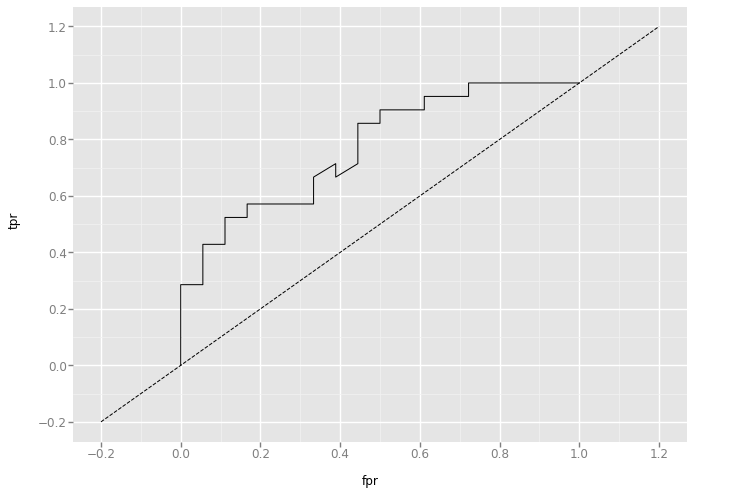

<ggplot: (100782847419)>

In [34]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid1.predict_proba(X1_test)
#print(probs)
preds = probs[:,1]
print(preds)
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [35]:
from sklearn.metrics import balanced_accuracy_score

print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.6349206349206349


Model1: f1=0.682 auc=0.814


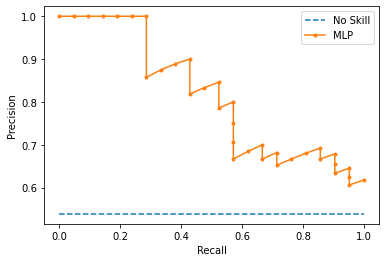

In [36]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid1.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid1.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='MLP')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


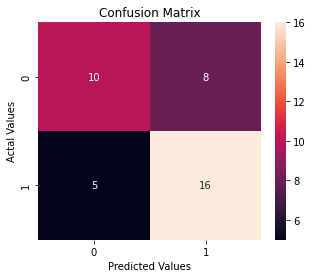

In [37]:
grid1.fit(X2_train, y2_train)
y2_pred = grid1.predict(X2_test)
#grid1.fit(X2_train, y2_train)

y2_pred = grid1.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)

#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [38]:
print(y2_pred)

[1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0]


In [39]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.67      0.76      0.71        21

    accuracy                           0.67        39
   macro avg       0.67      0.66      0.66        39
weighted avg       0.67      0.67      0.66        39



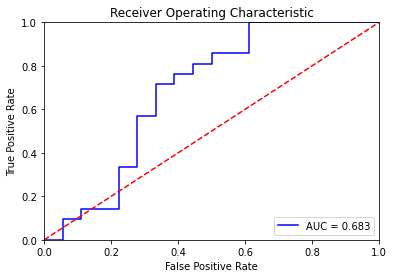

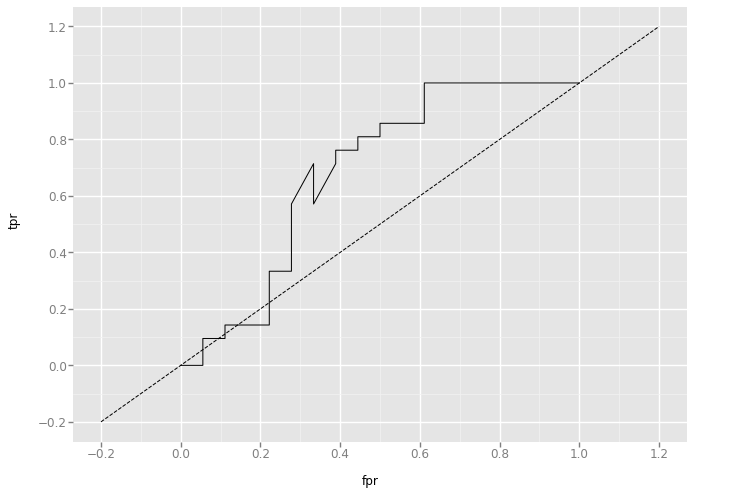

<ggplot: (100787775669)>

In [40]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid1.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [41]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.6587301587301587


Model1: f1=0.711 auc=0.612


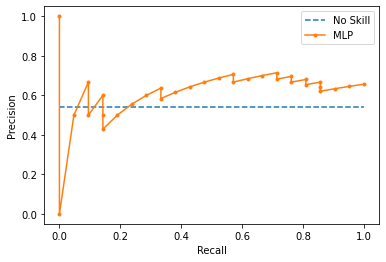

In [42]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid1.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid1.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='MLP')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Random forest

In [43]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
#n_depth_range = np.arange(1,32)
min_samples_split=np.arange(0.1,1.0)
criterion=['gini', 'entropy', 'log_loss']
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range,min_samples_split=min_samples_split,criterion=criterion)

rf = RandomForestClassifier()

grid2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid2.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid2.best_params_, grid2.best_score_))

C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\siagu\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterat

The best parameters are {'criterion': 'gini', 'max_features': 3, 'min_samples_split': 0.1, 'n_estimators': 70} with a score of 0.77


In [44]:
#model2 = RandomForestClassifier(n_estimators=50, max_features=5)

C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\siagu\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterat

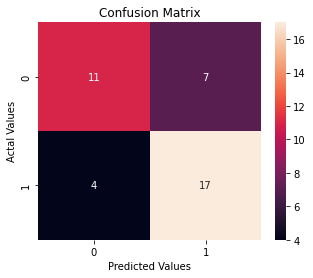

In [45]:
grid2.fit(X1_train, y1_train)  

y1_pred = grid2.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)


In [46]:
print(y1_pred)

[1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0
 1 1]


In [47]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.71      0.81      0.76        21

    accuracy                           0.72        39
   macro avg       0.72      0.71      0.71        39
weighted avg       0.72      0.72      0.71        39



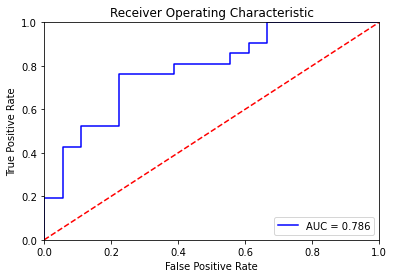

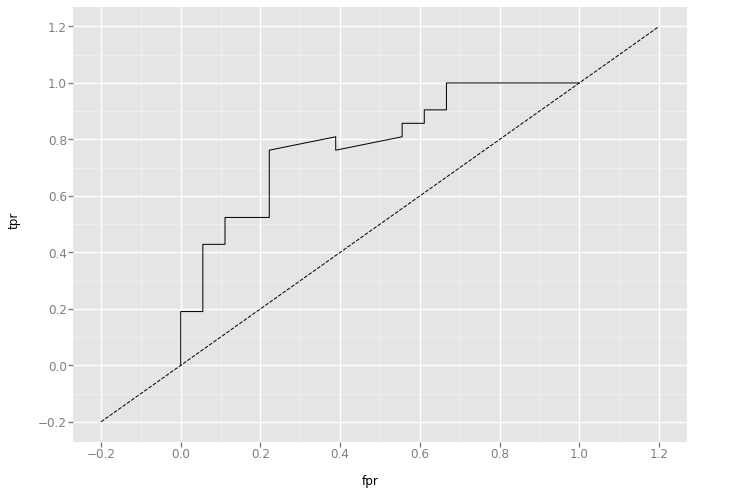

<ggplot: (100788028347)>

In [48]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid2.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [49]:
print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.7103174603174603


Model1: f1=0.756 auc=0.811


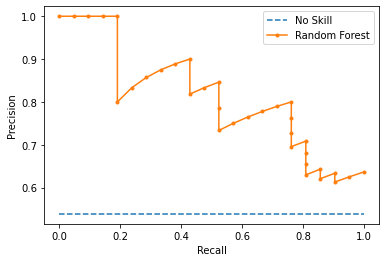

In [50]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid2.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid2.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\siagu\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterat

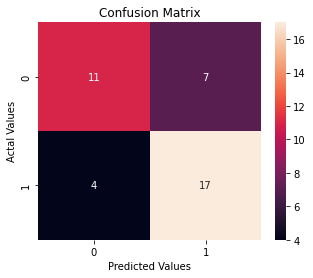

In [51]:
grid2.fit(X2_train, y2_train)

y2_pred = grid2.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [52]:
print(y2_pred)

[1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0
 1 1]


In [53]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.71      0.81      0.76        21

    accuracy                           0.72        39
   macro avg       0.72      0.71      0.71        39
weighted avg       0.72      0.72      0.71        39



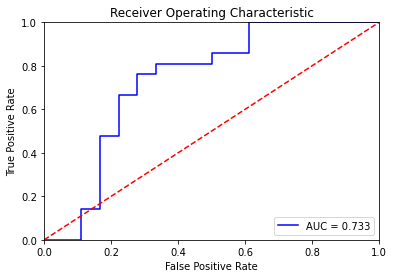

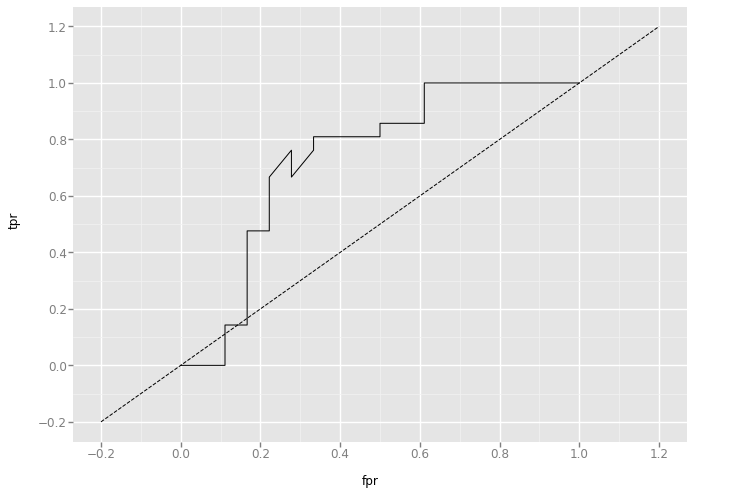

<ggplot: (100788112222)>

In [54]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid2.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [55]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.7103174603174603


Model1: f1=0.756 auc=0.648


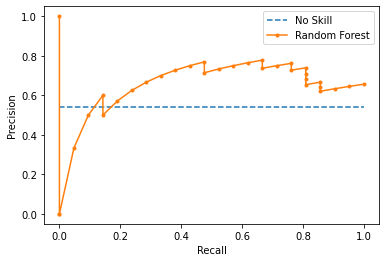

In [56]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid2.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid2.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Decision Tree

In [57]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
max_depth_range = np.arange(1,32)
criterion=['gini', 'entropy', 'log_loss']
min_samples_split=np.arange(0.1,1.0)
param_grid = dict(max_features=max_features_range, max_depth=max_depth_range,criterion=criterion,min_samples_split=min_samples_split)

rf = DecisionTreeClassifier()

grid3 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid3.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid3.best_params_, grid3.best_score_))

The best parameters are {'criterion': 'entropy', 'max_depth': 26, 'max_features': 2, 'min_samples_split': 0.1} with a score of 0.72


C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
775 fits failed out of a total of 2325.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
775 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CL

In [58]:
#model3 = DecisionTreeClassifier(max_depth=4, max_features=3) 

C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
775 fits failed out of a total of 2325.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
775 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CL

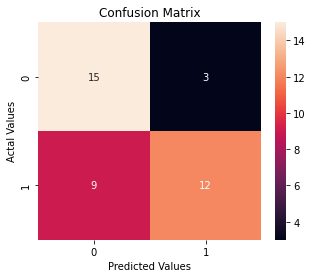

In [59]:
grid3.fit(X1_train, y1_train)  

y1_pred = grid3.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [60]:
print(y1_pred)

[1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0
 1 0]


In [61]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        18
           1       0.80      0.57      0.67        21

    accuracy                           0.69        39
   macro avg       0.71      0.70      0.69        39
weighted avg       0.72      0.69      0.69        39



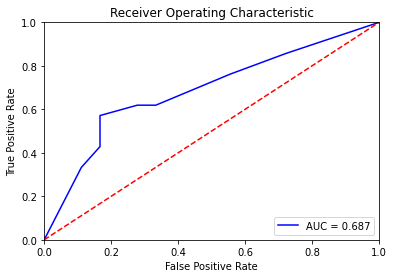

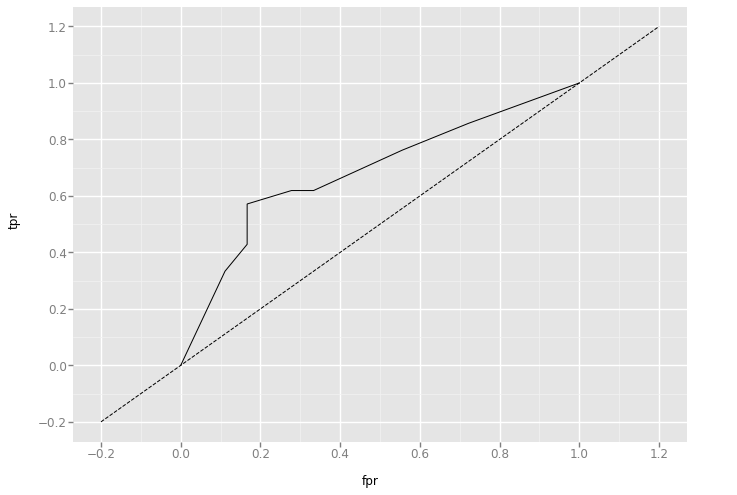

<ggplot: (100788119372)>

In [62]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid3.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [63]:
print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.7023809523809523


Model1: f1=0.667 auc=0.746


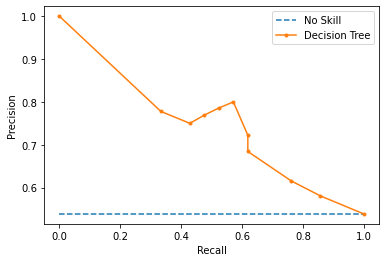

In [64]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid3.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid3.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
775 fits failed out of a total of 2325.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
775 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\siagu\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CL

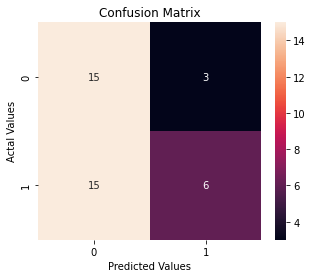

In [65]:
grid3.fit(X2_train, y2_train)

y2_pred = grid3.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [66]:
print(y2_pred)

[0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 1]


In [67]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62        18
           1       0.67      0.29      0.40        21

    accuracy                           0.54        39
   macro avg       0.58      0.56      0.51        39
weighted avg       0.59      0.54      0.50        39



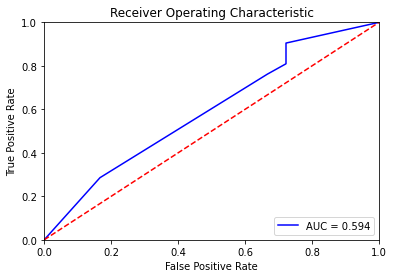

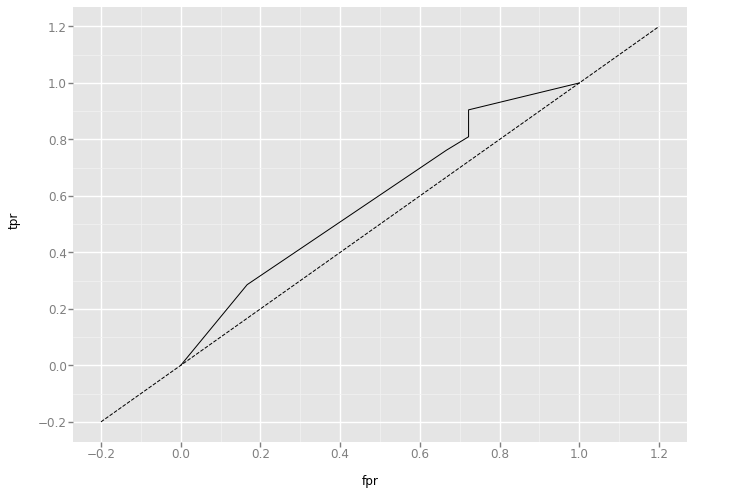

<ggplot: (100788608425)>

In [68]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid3.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [69]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.5595238095238095


Model1: f1=0.400 auc=0.669


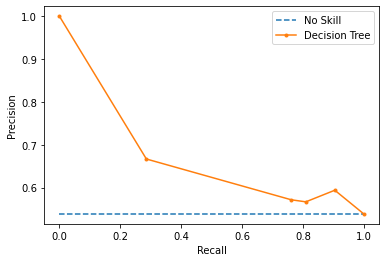

In [70]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid3.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid3.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM

In [71]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1000], 
              'gamma': [1, 0.1, 0.0001],
               'kernel': ['linear','rbf'],
                'class_weight':['balanced', None]} 
rf=SVC(probability=True)
grid4 = GridSearchCV(estimator=rf, param_grid=param_grid, refit = True, verbose = 3, cv=5)
  
# fitting the model for grid search
grid4.fit(X1_train, y1_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid4.best_params_, grid4.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.478 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.478 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=

[CV 2/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.696 total time=   0.0s
[CV 5/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.652 total time=   0.0s
[CV 1/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 4/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 5/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.609 total time=   0.0s
[CV 1/5] END C=1000, class_weight=None, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 2/5] END C=1000, class_weight=None, gamma=0.1, ke

In [72]:
#model4 = SVC(C=10,gamma=0.1, max_iter=4000)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.625 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.478 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.478 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=

[CV 3/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.739 total time=   0.0s
[CV 4/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.739 total time=   0.0s
[CV 5/5] END C=1000, class_weight=balanced, gamma=0.0001, kernel=rbf;, score=0.696 total time=   0.0s
[CV 1/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 2/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.696 total time=   0.0s
[CV 5/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.652 total time=   0.0s
[CV 1/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/5] END C=1000, class_w

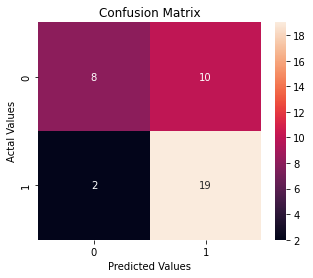

In [73]:
grid4.fit(X1_train, y1_train)  

y1_pred = grid4.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#print(cm)


In [74]:
print(y1_pred)

[1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1]


In [75]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57        18
           1       0.66      0.90      0.76        21

    accuracy                           0.69        39
   macro avg       0.73      0.67      0.67        39
weighted avg       0.72      0.69      0.67        39



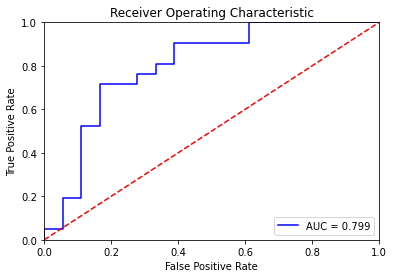

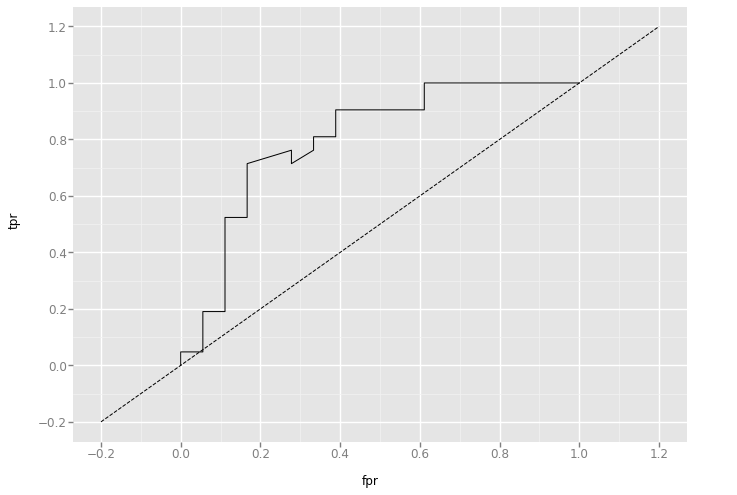

<ggplot: (100788624062)>

In [76]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid4.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [77]:
print("balanced_accuracy", balanced_accuracy_score(y1_test, y1_pred))

balanced_accuracy 0.6746031746031746


Model1: f1=0.760 auc=0.761


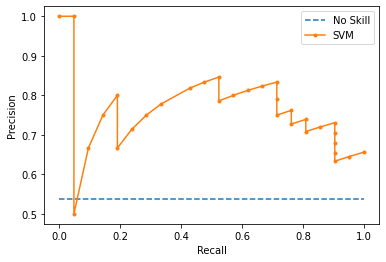

In [78]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid4.predict_proba(X1_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid4.predict(X1_test)
lr_precision, lr_recall, _ = precision_recall_curve(y1_test, lr_probs)
lr_f1, lr_auc = f1_score(y1_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y1_test[y1_test==1]) / len(y1_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.478 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.478 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.478 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.478 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.478 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=

[CV 2/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.792 total time=   0.0s
[CV 3/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 5/5] END C=1000, class_weight=None, gamma=1, kernel=linear;, score=0.696 total time=   0.0s
[CV 1/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 4/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 5/5] END C=1000, class_weight=None, gamma=1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 1/5] END C=1000, class_weight=None, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 2/5] END C=1000, class_weight=None, gamma=0.1, ke

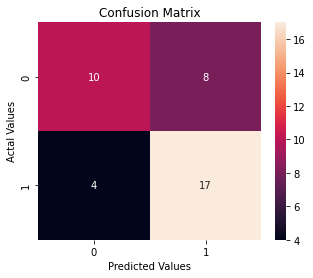

In [79]:
grid4.fit(X2_train, y2_train)

y2_pred = grid4.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
#print(cm)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [80]:
print(y2_pred)

[1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0]


In [81]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        18
           1       0.68      0.81      0.74        21

    accuracy                           0.69        39
   macro avg       0.70      0.68      0.68        39
weighted avg       0.70      0.69      0.69        39



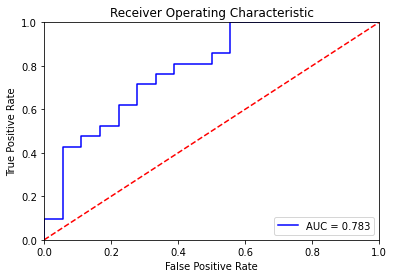

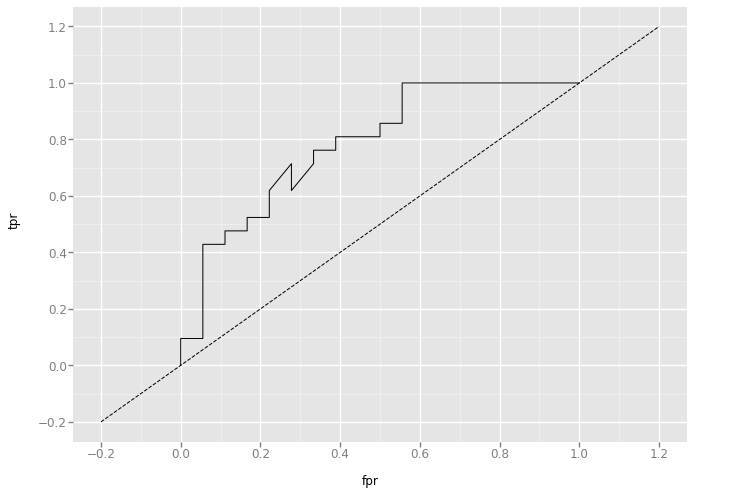

<ggplot: (100788251603)>

In [82]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid4.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [83]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.6825396825396826


Model1: f1=0.400 auc=0.782


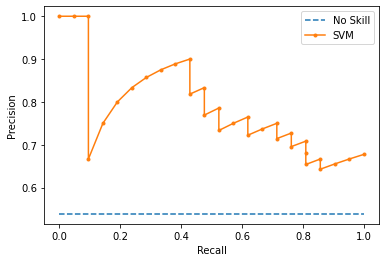

In [84]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = grid4.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid3.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [85]:
data = pd.read_csv(r"dataset_timeline1.csv")
data.shape

(12074, 3)

In [86]:
data.iloc[12073, :]

subreddit                                                 lgbt
body         I've posted in the past for advice about comin...
target                                                     NaN
Name: 12073, dtype: object

In [88]:
for i in range(12074):
    text = preprocess(data['body'][i])
    
    text = tfidf_vectorizer.transform([text])
    
    value = grid1.predict(text)
    
    data.iloc[i, -1] = value

In [89]:
data.head()

,subreddit,body,target
0,lgbt,Finally my first binder came in today and I'm ...,1.0
1,lgbt,Ok so growing up I've always loved girls no ma...,0.0
2,lgbt,"Hey, all! I wanted to make a help video on how...",0.0
3,lgbt,"I personally never have done it before,And I w...",1.0
4,lgbt,"Hello, I'm a Public Safety Officer at a relati...",1.0


In [90]:
data.tail()

,subreddit,body,target
12069,lgbt,I know this mightn't be the right subreddit to...,1.0
12070,lgbt,So last night i was riding an elevator and a t...,1.0
12071,lgbt,They keep referencing how depressed they are t...,1.0
12072,lgbt,"New, secret account for obvious reasons. Sorry...",1.0
12073,lgbt,I've posted in the past for advice about comin...,1.0


<AxesSubplot:>

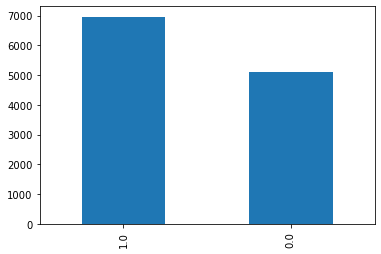

In [91]:
count=data['target'].value_counts()
count.plot(kind='bar')

In [92]:
count

1.0    6960
0.0    5114
Name: target, dtype: int64

In [93]:
data.to_csv('dataset_mlp.csv')

In [94]:
data1 = pd.read_csv(r"dataset_timeline1.csv")
data1.shape

(12074, 3)

In [95]:
data1.iloc[12073, :]

subreddit                                                 lgbt
body         I've posted in the past for advice about comin...
target                                                     NaN
Name: 12073, dtype: object